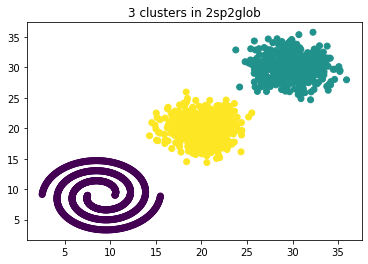

In [54]:
from sklearn.cluster import KMeans

### 2 Clustering aggloméré

# Charge le jeu de donnée : 2sp2glob
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred = KMeans(n_clusters=3, random_state=0).fit_predict(npliste)

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("3 clusters in 2sp2glob")
plt.show()


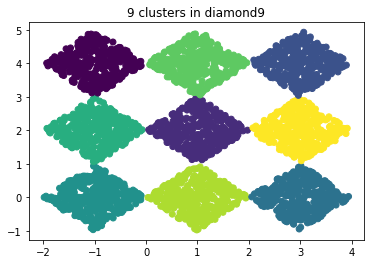

In [55]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 2 Clustering k-means (suite)

# Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

# Calcul les clusters pour le nombre attendus de cluster
pred = KMeans(n_clusters=9, random_state=0).fit_predict(npliste)

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("9 clusters in diamond9")
plt.show()


Mesures : [0.352, 0.388, 0.393, 0.415, 0.413, 0.466, 0.5, 0.549, 0.522, 0.493, 0.472]
Temps : [0.063, 0.061, 0.1, 0.11, 0.144, 0.121, 0.129, 0.1, 0.157, 0.184, 0.187]
Clusters :  9


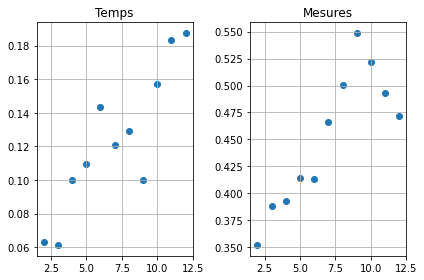

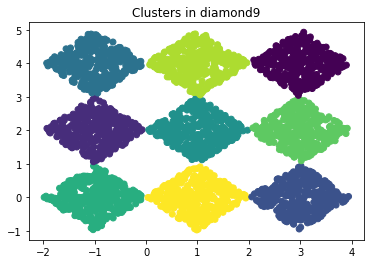

In [56]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import time

### 2 Clustering aggloméré (metrics)

### Charge le jeu de donnée : diamond9
data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
### Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
### Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

### Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
temps = []
mesures = []
nb_clusters = range(2, 13)
for i in nb_clusters:
    t1 = time.time()
    ### Appel de la méthode de clusterization
    model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("Mesures :",[round(num, 3) for num in mesures])
print("Temps :",[round(num, 3) for num in temps])

### Trouve le nombre de cluster maximisant Silhouette-Score
nb_cluster_max_score = mesures.index(max(mesures))+2
print("Clusters : ",nb_cluster_max_score)

### Affiche les résultats 
### Graphes des metrics
fig, figs = plt.subplots(nrows=1, ncols=2)
figs[0].scatter(nb_clusters, temps)
figs[0].grid()
figs[0].title.set_text('Temps')
figs[1].scatter(nb_clusters, mesures)
figs[1].grid()
figs[1].title.set_text('Mesures')
fig.tight_layout()

### Calcule les clusters pour le nombre maximisant le Silhouette-Score
### Appel de la méthode de clusterization
pred = KMeans(n_clusters=nb_cluster_max_score, random_state=0).fit_predict(npliste)
### Affiche la clusterisations
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in diamond9")
plt.show()


Mesures : [0.468, 0.622, 0.68, 0.734, 0.722, 0.766, 0.81, 0.838, 0.774, 0.726, 0.668]
Temps : [0.035, 0.044, 0.045, 0.064, 0.093, 0.096, 0.071, 0.088, 0.13, 0.154, 0.143]
Clusters :  9


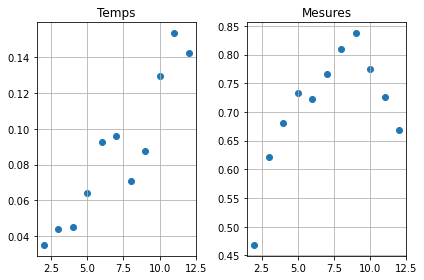

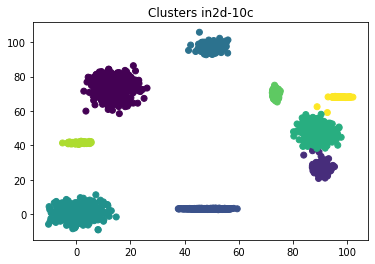

Mesures : [0.441, 0.489, 0.495, 0.495, 0.493, 0.509, 0.501, 0.526, 0.537, 0.552, 0.581]
Temps : [0.051, 0.049, 0.073, 0.072, 0.087, 0.085, 0.089, 0.105, 0.105, 0.106, 0.115]
Clusters :  12


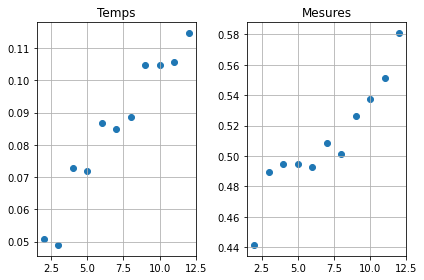

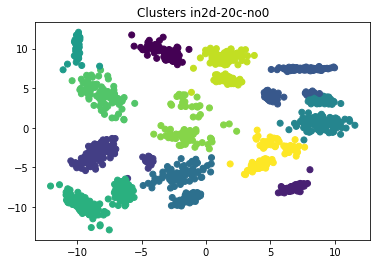

Mesures : [0.576, 0.489, 0.492, 0.458, 0.439, 0.413, 0.415, 0.413, 0.415, 0.371, 0.374]
Temps : [0.026, 0.043, 0.042, 0.057, 0.06, 0.067, 0.07, 0.076, 0.083, 0.1, 0.134]
Clusters :  2


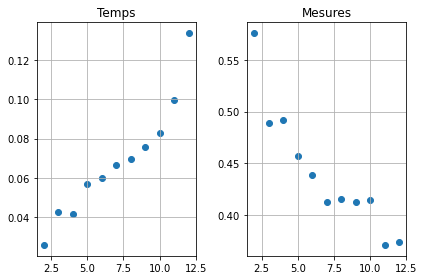

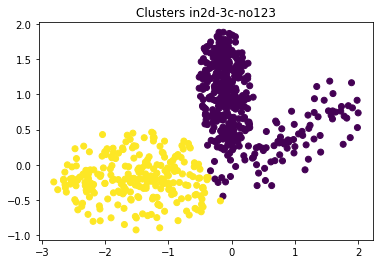

Mesures : [0.527, 0.587, 0.618, 0.575, 0.578, 0.553, 0.542, 0.541, 0.521, 0.519, 0.508]
Temps : [0.025, 0.033, 0.038, 0.056, 0.083, 0.092, 0.095, 0.114, 0.116, 0.138, 0.129]
Clusters :  4


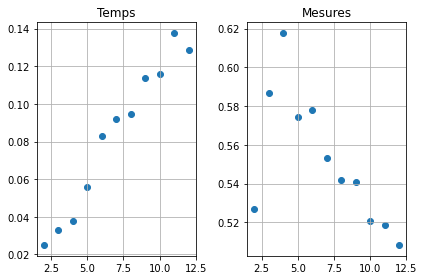

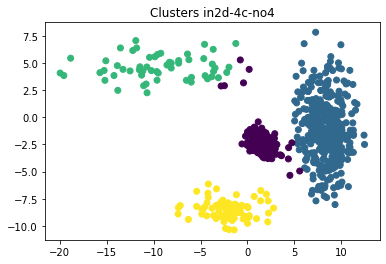

Mesures : [0.605, 0.594, 0.641, 0.624, 0.588, 0.453, 0.458, 0.45, 0.423, 0.414, 0.406]
Temps : [0.029, 0.033, 0.046, 0.063, 0.077, 0.102, 0.1, 0.111, 0.119, 0.139, 0.125]
Clusters :  4


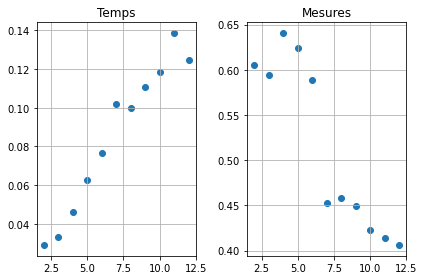

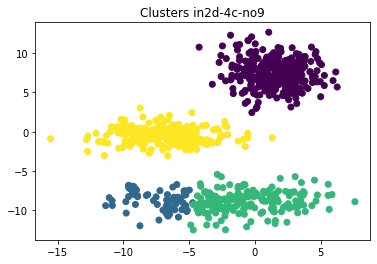

Mesures : [0.723, 0.867, 0.867, 0.724, 0.579, 0.57, 0.564, 0.56, 0.547, 0.546, 0.553]
Temps : [0.026, 0.028, 0.034, 0.049, 0.066, 0.079, 0.082, 0.098, 0.1, 0.109, 0.111]
Clusters :  4


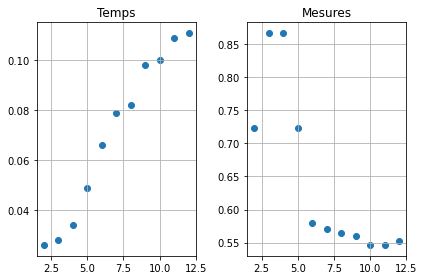

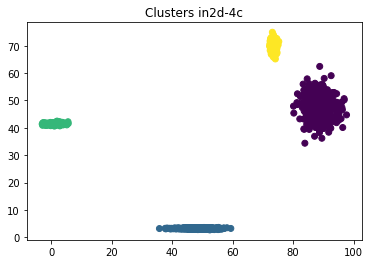

Mesures : [0.452, 0.326, 0.323, 0.335, 0.336, 0.329, 0.332, 0.339, 0.331, 0.33, 0.327]
Temps : [0.026, 0.069, 0.091, 0.162, 0.128, 0.102, 0.124, 0.14, 0.166, 0.17, 0.162]
Clusters :  2


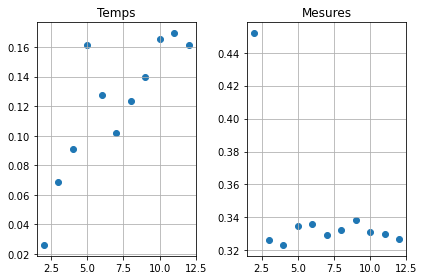

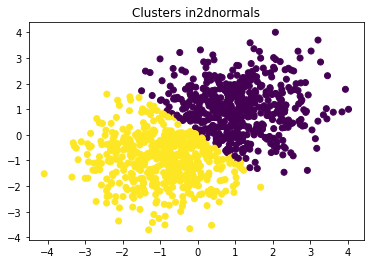

Mesures : [0.661, 0.696, 0.546, 0.556, 0.556, 0.449, 0.358, 0.342, 0.351, 0.357, 0.35]
Temps : [0.042, 0.03, 0.094, 0.061, 0.106, 0.128, 0.136, 0.133, 0.173, 0.157, 0.199]
Clusters :  3


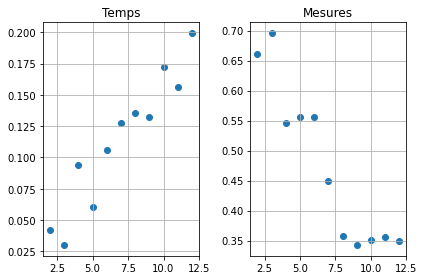

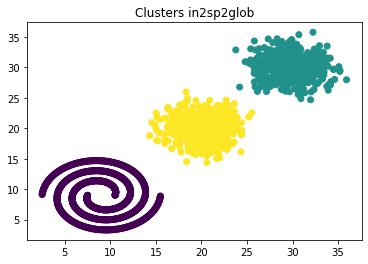

Mesures : [0.347, 0.361, 0.355, 0.348, 0.351, 0.356, 0.366, 0.376, 0.359, 0.366, 0.375]
Temps : [0.047, 0.047, 0.038, 0.05, 0.063, 0.068, 0.06, 0.081, 0.063, 0.066, 0.078]
Clusters :  9


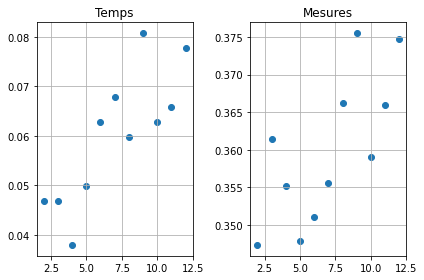

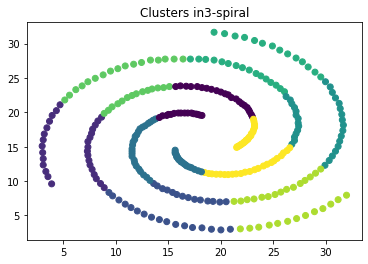

Mesures : [0.456, 0.523, 0.524, 0.498, 0.509, 0.481, 0.453, 0.458, 0.478, 0.453, 0.43]
Temps : [0.037, 0.05, 0.051, 0.059, 0.064, 0.097, 0.101, 0.121, 0.119, 0.128, 0.133]
Clusters :  4


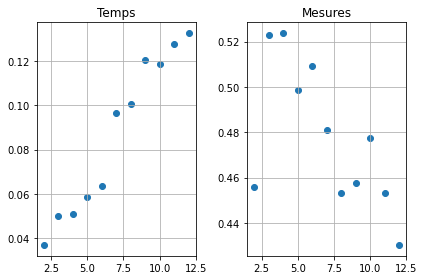

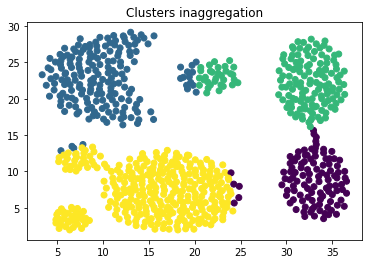

Mesures : [0.698, 0.835, 0.841, 0.83, 0.492, 0.475, 0.477, 0.434, 0.443, 0.444, 0.41]
Temps : [0.019, 0.028, 0.038, 0.045, 0.067, 0.065, 0.086, 0.097, 0.112, 0.117, 0.111]
Clusters :  4


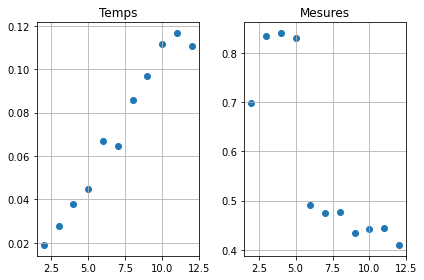

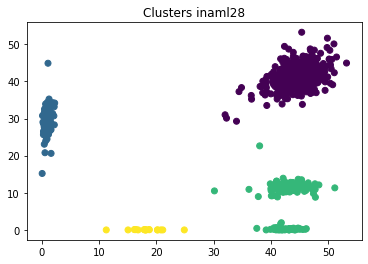

Mesures : [0.488, 0.535, 0.594, 0.635, 0.646, 0.649, 0.642, 0.637, 0.342, 0.357, 0.537]
Temps : [0.022, 0.053, 0.059, 0.07, 0.067, 0.099, 0.072, 0.11, 0.099, 0.114, 0.119]
Clusters :  7


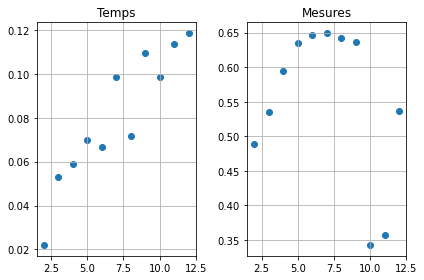

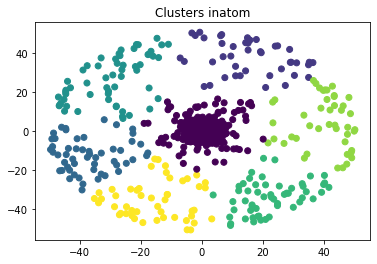

Mesures : [0.465, 0.454, 0.462, 0.476, 0.505, 0.502, 0.522, 0.521, 0.52, 0.518, 0.512]
Temps : [0.06, 0.108, 0.119, 0.134, 0.149, 0.177, 0.165, 0.153, 0.221, 0.211, 0.232]
Clusters :  8


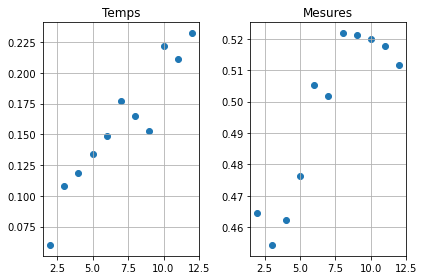

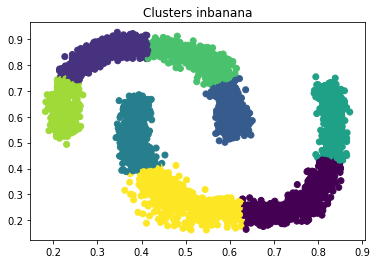

KeyboardInterrupt: 

In [69]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import time

### 2 Clustering aggloméré (metrics)

def metricsandclusterisationof(name):
    path = './clustering-benchmark-master/src/main/resources/datasets/artificial/'
    file_path = path + name + '.arff'
    ### Charge le jeu de donnée
    data = arff.loadarff(open(file_path,'r'))[0]
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])

    ### Calcule les Silhouette-score et les temps d'exécution pour 2 à 13 clusters
    temps = []
    mesures = []
    nb_clusters = range(2, 13)
    for i in nb_clusters:
        t1 = time.time()
        ### Appel de la méthode de clusterization
        model = KMeans(n_clusters=i, random_state=1).fit(npliste)
        t2 = time.time()
        labels = model.labels_
        mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
        temps += [t2-t1]
        mesures += [mesure]

    print("Mesures :",[round(num, 3) for num in mesures])
    print("Temps :",[round(num, 3) for num in temps])

    ### Trouve le nombre de cluster maximisant Silhouette-Score
    nb_cluster_max_score = mesures.index(max(mesures))+2
    print("Clusters : ",nb_cluster_max_score)

    ### Affiche les résultats 
    ### Graphes des metrics
    fig, figs = plt.subplots(nrows=1, ncols=2)
    figs[0].scatter(nb_clusters, temps)
    figs[0].grid()
    figs[0].title.set_text('Temps')
    figs[1].scatter(nb_clusters, mesures)
    figs[1].grid()
    figs[1].title.set_text('Mesures')
    fig.tight_layout()

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    pred = KMeans(n_clusters=nb_cluster_max_score, random_state=0).fit_predict(npliste)
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in" + name
    plt.title(cluster_name)
    plt.show()

l=os.listdir('./clustering-benchmark-master/src/main/resources/datasets/artificial/')
li=[i for i in l if 'arff' in i]
lis=[x.split('.')[0] for x in l]
for i in lis:
    try:
        metricsandclusterisationof(i)
    except Exception:
        pass

In [67]:
import os
l=os.listdir('./clustering-benchmark-master/src/main/resources/datasets/artificial/')
print(l)
li=[i for i in l if 'arff' in i]
print(li)
lis=[x.split('.')[0] for x in l]
print(lis)

['2d-10c.arff', '2d-20c-no0.arff', '2d-3c-no123.arff', '2d-4c-no4.arff', '2d-4c-no9.arff', '2d-4c.arff', '2dnormals.arff', '2sp2glob.arff', '3-spiral.arff', '3MC.arff', 'aggregation.arff', 'aml28.arff', 'atom.arff', 'banana.arff', 'birch-rg1.arff', 'birch-rg2.arff', 'birch-rg3.arff', 'blobs.arff', 'cassini.arff', 'chainlink.arff', 'circle.arff', 'cluto-t4-8k.arff', 'cluto-t5-8k.arff', 'cluto-t7-10k.arff', 'cluto-t8-8k.arff', 'complex8.arff', 'complex9.arff', 'compound.arff', 'cuboids.arff', 'cure-t0-2000n-2D.arff', 'cure-t1-2000n-2D.arff', 'cure-t2-4k.arff', 'curves1.arff', 'curves2.arff', 'D31.arff', 'dartboard1.arff', 'dartboard2.arff', 'dense-disk-3000.arff', 'dense-disk-5000.arff', 'diamond9.arff', 'disk-1000n.arff', 'disk-3000n.arff', 'disk-4000n.arff', 'disk-4500n.arff', 'disk-4600n.arff', 'disk-5000n.arff', 'disk-6000n.arff', 'donut1.arff', 'donut2.arff', 'donut3.arff', 'donutcurves.arff', 'dpb.arff', 'dpc.arff', 'DS-577.arff', 'DS-850.arff', 'ds2c2sc13.arff', 'ds3c3sc6.arff', '